In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import quad
import scipy.integrate as solode
from tqdm import tqdm
from scipy.optimize import fsolve

In [13]:
def h(pt, m, c):
    s = np.exp(m*(pt-c))/(1+np.exp(m*(pt-c)))
    h = 5*s*(1-s)
    return h

def EDO(f, pt, m, c): 
    dydt = f - f*f - h(pt, m, c)
    return dydt

def solveEDO(pt, p0, y0, m, c):
    p = np.linspace(p0, pt, 100)
    sol = odeint(EDO, y0, p, args=(m, c)) 
    return p, sol

In [14]:
data_SP = pd.read_excel(r'Equity-DM.xlsx', sheet_name='data', index_col = 0)['USD']
data_SP = data_SP[(data_SP.index.year>2019) & (data_SP.index<'2020-06-02')]
dates = pd.to_datetime(data_SP.index)
data_SP.head()

Date
2020-01-01    560.424530
2020-01-02    565.263700
2020-01-03    561.170352
2020-01-06    562.592617
2020-01-07    561.153007
Name: USD, dtype: float64

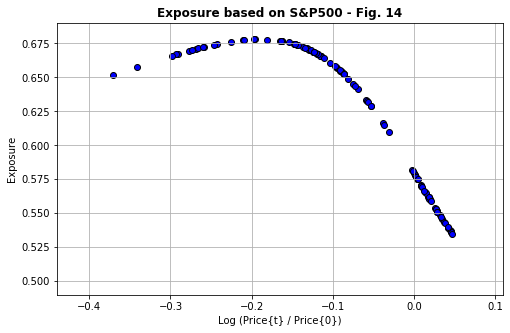

In [15]:
p_sim, expo_sim = solveEDO(1, -1, 0.5, 16, 0)

data_SP_rebas = np.log(data_SP/data_SP[0])

expo_SP = np.interp(np.array(data_SP_rebas).flatten(), np.array(p_sim).flatten(), np.array(expo_sim).flatten())

plt.figure(figsize=(8,5))
plt.grid()
plt.scatter(data_SP_rebas, expo_SP, color='blue', edgecolor='black')
plt.xlim(left=-0.44, right=0.11)
plt.ylim(bottom=0.49, top=0.69)
plt.title('Exposure based on S&P500 - Fig. 14', fontweight="bold")
plt.xlabel('Log (Price{t} / Price{0})')
plt.ylabel('Exposure')
plt.show()

In [16]:
def getPNL(prices, exposure):

    pnl = np.full(len(prices), 0.0)
    returns = np.diff(prices, 1)
    returns = np.insert(returns, 0, 0.0)
    
    for i in range(len(prices)):        
        pnl[i] = returns[i]*exposure[i] #Long only

    return pnl

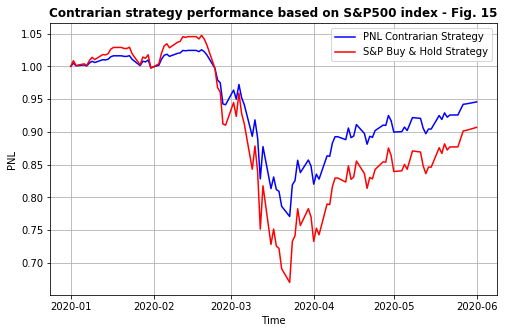

In [17]:
returns_SP = np.diff(data_SP_rebas, 1)
returns_SP = np.insert(returns_SP, 0, 0.0)
pnl_SP = getPNL(data_SP_rebas, expo_SP)

plt.figure(figsize=(8,5))
plt.grid()
plt.plot(data_SP_rebas.index, np.cumprod(1+pnl_SP), color='blue', label='PNL Contrarian Strategy')
plt.plot(data_SP_rebas.index, np.cumprod(1+returns_SP), color='red', label='S&P Buy & Hold Strategy')
plt.title('Contrarian strategy performance based on S&P500 index - Fig. 15', fontweight="bold")
plt.xlabel('Time')
plt.ylabel('PNL')
plt.legend()
plt.show()